In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns

# Education participation rate

Load the table setting the participation rate for given age and NUTS3 level.

Since we have the data for the 4, 17, 20-24 age groups we will use the 4 years old data for the kindergarten-primary school (age 0-9) and the 17 years old data for the secondary school (10-17) abd the 20-24 for the tertiary (university) attendance rate.

We delete the 15-24 range as it is too wide.

In [3]:
educationRateDF = pd.read_csv("resources/Europe/population/structure/ageEducationStatus_NUTS3_2013-2016_educ_uoe_enra14.tsv",
                              sep="\t", na_values=":")

columnCodes = educationRateDF.columns[0]
educationRateDF["age"] = educationRateDF[columnCodes].apply(lambda v: v.split(",")[1])
educationRateDF["NUTS"] = educationRateDF[columnCodes].apply(lambda v: v.split(",")[2])

del educationRateDF[columnCodes]

educationRateDF = educationRateDF.astype(dtype={"NUTS": 'str', "age": 'str',
                                                '2016': 'float', '2015': 'float',
                                                '2014': 'float', '2013': 'float'})

educationRateDF = educationRateDF[educationRateDF["age"] != "Y15-24"]

educationRateDF.replace({"age": {"Y17": "10-17", "Y4": "0-9", "Y20-24": "18-24"}}, inplace=True)

educationRateDF = educationRateDF.pivot_table(columns=["age"], index=["NUTS"])

#Make it a probability...
educationRateDF /= 100.

educationRateDF.head()

2013                 2014                 2015                 2016  \
age     0-9  10-17  18-24    0-9  10-17  18-24    0-9  10-17  18-24    0-9   
NUTS                                                                         
AT    0.914  0.886  0.350  0.919  0.892  0.345  0.927  0.894  0.346  0.929   
AT1   0.928  0.866  0.417  0.934  0.868  0.408  0.941  0.874  0.407  0.948   
AT11  0.995  0.876  0.099  0.988  0.871  0.106  0.969  0.884  0.117  0.972   
AT12  0.970  0.759  0.110  0.970  0.767  0.114  0.950  0.772  0.116  0.971   
AT13  0.882  0.985  0.687  0.895  0.982  0.665  0.929  0.986  0.658  0.925   

                    
age   10-17  18-24  
NUTS                
AT    0.870  0.341  
AT1   0.847  0.399  
AT11  0.848  0.120  
AT12  0.748  0.118  
AT13  0.955  0.630

In [4]:
print educationRateDF.shape
print educationRateDF.count()

(399, 12)
      age  
2013  0-9      374
      10-17    374
      18-24    371
2014  0-9      387
      10-17    387
      18-24    384
2015  0-9      367
      10-17    367
      18-24    367
2016  0-9      144
      10-17    144
      18-24    144
dtype: int64


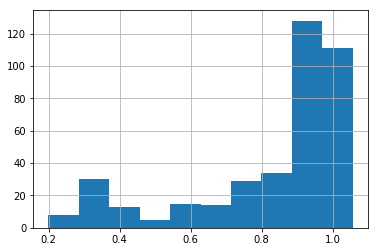

In [5]:
educationRateDF[("2014", "0-9")].hist()

# Education level for the whole population

Load the education level for the 25-64 age bracket (these data will be projected on the entire population between 18 and 100 years old).

For people younger than 18 years we will assume that their education level is the one completed BEFORE their age (i.e., a child of 12 years will be assigned to the elementary/primary level as the secondary ends at 17 y.o.).

In [6]:
educationLevelPopDF = pd.read_csv("resources/Europe/population/structure/educationLevelPopulation_200-2016_edat_lfse_04.tsv", sep="\t", na_values=":")

columnCodes = educationLevelPopDF.columns[0]
educationLevelPopDF["sex"] = educationLevelPopDF[columnCodes].apply(lambda v: v.split(",")[0])
educationLevelPopDF["edu"] = educationLevelPopDF[columnCodes].apply(lambda v: v.split(",")[1])
educationLevelPopDF["age"] = educationLevelPopDF[columnCodes].apply(lambda v: v.split(",")[2])
educationLevelPopDF["NUTS"] = educationLevelPopDF[columnCodes].apply(lambda v: v.split(",")[4])

del educationLevelPopDF[columnCodes]

educationLevelPopDF = educationLevelPopDF[educationLevelPopDF["edu"] != "ED3-8"]

educationLevelPopDF.replace({
                              "age": {"Y25-64": "18-100"},
                              "edu": {
                                  "ED0-2": "primary",
                                  "ED3_4": "secondary",
                                  "ED5-8": "tertiary",
                              },
                            }, inplace=True)

educationLevelPopDF = educationLevelPopDF.pivot_table(index=["NUTS"], columns=["age", "sex", "edu"])

educationLevelPopDF.head()

2000                                                                  \
age   18-100                                                                   
sex        F                          M                          T             
edu  primary secondary tertiary primary secondary tertiary primary secondary   
NUTS                                                                           
AT      30.3      58.4     11.3    17.3      65.8     16.9    23.8      62.1   
AT1     28.1      58.6     13.3    16.7      64.7     18.6    22.5      61.6   
AT11    42.2      48.8      8.9    21.0      65.9     13.1    31.4      57.6   
AT12    30.8      58.9     10.2    17.0      67.2     15.8    23.8      63.1   
AT13    23.6      59.8     16.6    15.8      62.2     22.0    19.8      61.0   

                 2001   ...        2015    2016                             \
age            18-100   ...      18-100  18-100                              
sex                 F   ...           T       F                          M   
edu  tertiary primary   ...    tertiary primary secondary tertiary primary   
NUTS                    ...                                                  
AT       14.1    28.7   ...        30.6    19.2      50.2     30.6    11.8   
AT1      15.9    27.2   ...        34.6    19.3      45.9     34.8    12.5   
AT11     11.0    39.8   ...        28.5    23.0      49.9     27.1    10.0   
AT12     13.0    28.4   ...        30.3    19.1      52.2     28.7    10.3   
AT13     19.2    24.3   ...        39.3    18.9      39.9     41.2    14.9   

                                                    
age                                                 
sex                           T                     
edu  secondary tertiary primary secondary tertiary  
NUTS                                                
AT        56.1     32.2    15.5      53.1     31.4  
AT1       52.7     34.8    15.9      49.3     34.8  
AT11      61.5     28.6    16.5      55.7     27.9  
AT12      58.1     31.6    14.7      55.1     30.2  
AT13      46.5     38.6    16.9      43.2     39.9  

[5 rows x 153 columns]

In [7]:
# Transform it to PDF and CDF...
educationLevelPopPDF_df = educationLevelPopDF.copy(deep=True)
educationLevelPopCDF_df = educationLevelPopDF.copy(deep=True)

last_tuple = None
for year, age, sex, level in educationLevelPopDF.columns.tolist():
    tmp_tuple = (year, age, sex)
    
    if tmp_tuple != last_tuple:
        last_tuple = tmp_tuple
    else:
        continue
    
    tmp_df = educationLevelPopDF[tmp_tuple].copy(deep=True)
    tmp_sumdf = tmp_df.sum(axis=1)
    
    tmp_cdf = tmp_df.cumsum(axis=1).div(tmp_sumdf, axis=0)
    educationLevelPopCDF_df[tmp_tuple] = tmp_cdf.copy(deep=True)
    
    educationLevelPopPDF_df[tmp_tuple] = tmp_df.div(tmp_sumdf, axis=0)

In [8]:
educationLevelPopPDF_df.head()

2000                                                           \
age     18-100                                                            
sex          F                           M                            T   
edu    primary secondary  tertiary primary secondary tertiary   primary   
NUTS                                                                      
AT    0.303000  0.584000  0.113000   0.173     0.658    0.169  0.238000   
AT1   0.281000  0.586000  0.133000   0.167     0.647    0.186  0.225000   
AT11  0.422422  0.488488  0.089089   0.210     0.659    0.131  0.314000   
AT12  0.308308  0.589590  0.102102   0.170     0.672    0.158  0.238238   
AT13  0.236000  0.598000  0.166000   0.158     0.622    0.220  0.198000   

                             2001    ...         2015    2016            \
age                        18-100    ...       18-100  18-100             
sex                             F    ...            T       F             
edu  secondary tertiary   primary    ...     tertiary primary secondary   
NUTS                                 ...                                  
AT    0.621000  0.14100  0.287000    ...     0.305694   0.192     0.502   
AT1   0.616000  0.15900  0.272000    ...     0.345654   0.193     0.459   
AT11  0.576000  0.11000  0.398000    ...     0.285000   0.230     0.499   
AT12  0.631632  0.13013  0.284000    ...     0.303000   0.191     0.522   
AT13  0.610000  0.19200  0.243243    ...     0.393000   0.189     0.399   

                                                                           
age                                                                        
sex                   M                             T                      
edu  tertiary   primary secondary  tertiary   primary secondary  tertiary  
NUTS                                                                       
AT      0.306  0.117882  0.560440  0.321678  0.155000  0.531000  0.314000  
AT1     0.348  0.125000  0.527000  0.348000  0.159000  0.493000  0.348000  
AT11    0.271  0.099900  0.614386  0.285714  0.164835  0.556444  0.278721  
AT12    0.287  0.103000  0.581000  0.316000  0.147000  0.551000  0.302000  
AT13    0.412  0.149000  0.465000  0.386000  0.169000  0.432000  0.399000  

[5 rows x 153 columns]

In [9]:
educationLevelPopCDF_df.head()

2000                                                          \
age     18-100                                                           
sex          F                          M                            T   
edu    primary secondary tertiary primary secondary tertiary   primary   
NUTS                                                                     
AT    0.303000  0.887000      1.0   0.173     0.831      1.0  0.238000   
AT1   0.281000  0.867000      1.0   0.167     0.814      1.0  0.225000   
AT11  0.422422  0.910911      1.0   0.210     0.869      1.0  0.314000   
AT12  0.308308  0.897898      1.0   0.170     0.842      1.0  0.238238   
AT13  0.236000  0.834000      1.0   0.158     0.780      1.0  0.198000   

                             2001   ...        2015    2016            \
age                        18-100   ...      18-100  18-100             
sex                             F   ...           T       F             
edu  secondary tertiary   primary   ...    tertiary primary secondary   
NUTS                                ...                                 
AT     0.85900      1.0  0.287000   ...         1.0   0.192     0.694   
AT1    0.84100      1.0  0.272000   ...         1.0   0.193     0.652   
AT11   0.89000      1.0  0.398000   ...         1.0   0.230     0.729   
AT12   0.86987      1.0  0.284000   ...         1.0   0.191     0.713   
AT13   0.80800      1.0  0.243243   ...         1.0   0.189     0.588   

                                                                         
age                                                                      
sex                   M                            T                     
edu  tertiary   primary secondary tertiary   primary secondary tertiary  
NUTS                                                                     
AT        1.0  0.117882  0.678322      1.0  0.155000  0.686000      1.0  
AT1       1.0  0.125000  0.652000      1.0  0.159000  0.652000      1.0  
AT11      1.0  0.099900  0.714286      1.0  0.164835  0.721279      1.0  
AT12      1.0  0.103000  0.684000      1.0  0.147000  0.698000      1.0  
AT13      1.0  0.149000  0.614000      1.0  0.169000  0.601000      1.0  

[5 rows x 153 columns]

# The employment rate per sex, age and edu


We have three possible tables at the eurostat:
- `lfsa_ergaed_lfst_r_lfe2eedu` reports data per sex, age groups (15-24, 25-64 and 65-74 age brackets) and education level at the NUTS2 level as thousands of people employed per geo-area. This needs to be aggregated with data on population;
- `lfst_r_lfe2emprtcob` reports the employment rate per education level and the 15-64 unique age group at NUTS2 level; we will skip this method as it reports less information than the first one.
- `lfsa_ergaed` reports employment rates per NUTS0 (countries) for finer age groups but broader geo-areas. This has not to be extended with population data.

## `lfsa_ergaed_lfst_r_lfe2eedu` at NUTS2 level

Load the probability to be employed by NUTS2, age, sex and education level.

Then we load the population count to compute the number of people that live in the NUTS and have that education level using the just computed education level PDF. In this way we will get the employment rate.

We start from the number of employed people for each NUTS by sex, age and edu:

$E^{(NUTS)}(s,a,e)$

Then we coumpute the population of that NUTS that have the same traits:

$N^{(NUTS)}(s,a,e) = P^{(NUTS)}(s,a) \cdot f^{(NUTS)}(e|s,a)$

where $P^{(NUTS)}(s,a)$ is the total population of that sex and age and $f^{(NUTS)}(e|s,a)$ is the fraction of people having the education $e$ given their sex $s$ and age $e$.
We can then compute the employment rate $e^{(NUTS)}(s,a,e)$ as:

$e^{(NUTS)}(s,a,e) = E^{(NUTS)}(s,a,e)/N^{(NUTS)}(s,a,e)$

In [10]:
employmentAgeSexEduDF = pd.read_csv("resources/Europe/population/structure/employmentsRatePerAgeSexEdu_NUTS2_1999-2016_lfsa_ergaed_lfst_r_lfe2eedu.tsv",
                                   sep="\t", na_values=":")

columnCodes = employmentAgeSexEduDF.columns[0]
employmentAgeSexEduDF["sex"] = employmentAgeSexEduDF[columnCodes].apply(lambda v: v.split(",")[1])
employmentAgeSexEduDF["age"] = employmentAgeSexEduDF[columnCodes].apply(lambda v: v.split(",")[2])
employmentAgeSexEduDF["edu"] = employmentAgeSexEduDF[columnCodes].apply(lambda v: v.split(",")[3])
employmentAgeSexEduDF["NUTS"] = employmentAgeSexEduDF[columnCodes].apply(lambda v: v.split(",")[4])

del employmentAgeSexEduDF[columnCodes]


employmentAgeSexEduDF.replace({
                              "age": {
                                  "Y15-24": "15-24",
                                  "Y25-64": "25-64",
                                  "Y65-74": "65-74",
                                     },
                              "edu": {
                                  "ED0-2": "primary",
                                  "ED3_4": "secondary",
                                  "ED5-8": "tertiary",
                              },
                            }, inplace=True)

employmentAgeSexEduDF = employmentAgeSexEduDF[employmentAgeSexEduDF["edu"].isin(["primary", "secondary", "tertiary"])]
employmentAgeSexEduDF = employmentAgeSexEduDF[employmentAgeSexEduDF["age"].isin(["15-24", "25-64", "65-74"])]

employmentAgeSexEduDF = employmentAgeSexEduDF.pivot_table(index=["NUTS"], columns=["age", "sex", "edu"])
employmentAgeSexEduDF.replace(to_replace=np.NaN, value=1., inplace=True)

# It is in thousands
employmentAgeSexEduDF *= 1000.
employmentAgeSexEduDF.head()

1999                                                            \
age     15-24                                                             
sex         F                            M                            T   
edu   primary secondary tertiary   primary secondary tertiary   primary   
NUTS                                                                      
AT    70300.0  154000.0  10200.0  102300.0  160800.0   5200.0  172600.0   
AT1   27300.0   60300.0   4900.0   38500.0   65200.0   1000.0   65900.0   
AT11   1000.0    6000.0   1000.0    4200.0    5500.0   1000.0    6500.0   
AT12  15000.0   28000.0   1000.0   17000.0   33700.0   1000.0   32000.0   
AT13  10100.0   26300.0   1000.0   17300.0   26000.0   1000.0   27400.0   

                                    ...          2016                    \
age                         25-64   ...         25-64   65-74             
sex                             F   ...             T       F             
edu  secondary tertiary   primary   ...      tertiary primary secondary   
NUTS                                ...                                   
AT    314800.0  15300.0  331200.0   ...     1300800.0  8100.0   12400.0   
AT1   125500.0   7300.0  141700.0   ...      624700.0  1000.0    6600.0   
AT11   11600.0   1000.0   14200.0   ...       39300.0  1000.0    1000.0   
AT12   61700.0   1000.0   61300.0   ...      241400.0  1000.0    3100.0   
AT13   52200.0   1000.0   66200.0   ...      344100.0  1000.0    3300.0   

                                                                      
age                                                                   
sex                 M                           T                     
edu  tertiary primary secondary tertiary  primary secondary tertiary  
NUTS                                                                  
AT     5100.0  6500.0   12900.0  16100.0  14600.0   25300.0  21200.0  
AT1    1000.0  1000.0    4400.0   7600.0   4900.0   11000.0  10300.0  
AT11   1000.0  1000.0    1000.0   1000.0   1000.0    1000.0   1000.0  
AT12   1000.0  1000.0    1000.0   1000.0   3700.0    5000.0   3300.0  
AT13   1000.0  1000.0    1000.0   4700.0   1000.0    5600.0   6800.0  

[5 rows x 486 columns]

In [11]:
# Load data on population
popNUTS2df = pd.read_csv("resources/Europe/population/structure/populationSexAgeGroup_NUTS2_1990-2018_demo_r_pjangroup.tsv", sep="\t", na_values=":")

columnCodes = popNUTS2df.columns[0]
popNUTS2df["sex"] =  popNUTS2df[columnCodes].apply(lambda v: v.split(",")[1])
popNUTS2df["age"] =  popNUTS2df[columnCodes].apply(lambda v: v.split(",")[2])
popNUTS2df["NUTS"] = popNUTS2df[columnCodes].apply(lambda v: v.split(",")[3])

del popNUTS2df[columnCodes]

popNUTS2df = popNUTS2df[popNUTS2df["age"] != "UNK"]
popNUTS2df = popNUTS2df.pivot_table(index=["NUTS"], columns=["age", "sex"])
popNUTS2df.head(2)

1990                                                 ...         2016  \
age  TOTAL         Y10-14         Y15-19         Y20-24    ...       Y_GE75   
sex      F   M   T      F   M   T      F   M   T      F    ...            T   
NUTS                                                       ...                
AL     NaN NaN NaN    NaN NaN NaN    NaN NaN NaN    NaN    ...     144099.0   
AL0    NaN NaN NaN    NaN NaN NaN    NaN NaN NaN    NaN    ...     144099.0   

                                                                             \
age    Y_GE80                     Y_GE85                     Y_LT5            
sex         F        M        T        F       M        T        F        M   
NUTS                                                                          
AL    36963.0  27041.0  64004.0  13716.0  8112.0  21828.0  81305.0  86277.0   
AL0   36963.0  27041.0  64004.0  13716.0  8112.0  21828.0  81305.0  86277.0   

                
age             
sex          T  
NUTS            
AL    167582.0  
AL0   167582.0  

[2 rows x 1701 columns]

In [12]:
employmentAgeSexEduDF.columns.get_level_values("age").unique()

Index([u'15-24', u'25-64', u'65-74'], dtype='object', name=u'age')

In [13]:
popNUTS2df.columns.get_level_values("age").unique()

Index([u'TOTAL', u'Y10-14', u'Y15-19', u'Y20-24', u'Y25-29', u'Y30-34',
       u'Y35-39', u'Y40-44', u'Y45-49', u'Y5-9', u'Y50-54', u'Y55-59',
       u'Y60-64', u'Y65-69', u'Y70-74', u'Y75-79', u'Y80-84', u'Y_GE75',
       u'Y_GE80', u'Y_GE85', u'Y_LT5'],
      dtype='object', name=u'age')

In [14]:
# Create the counter for the age groups of the employment table
aggregationAges = {
                    "15-24": ["Y15-19", "Y20-24"],
                    "25-64": ["Y25-29", "Y30-34", "Y35-39", "Y40-44", "Y45-49", "Y50-54", "Y55-59", "Y60-64"],
                    "65-74": ["Y65-69", "Y70-74"],
                  }

for year in popNUTS2df.columns.get_level_values(0).unique():
    tmp_df = popNUTS2df[year]
    for aggName, aggCols in aggregationAges.iteritems():
        tmp_df_sum = tmp_df[aggCols[0]]
        
        for col in aggCols[1:]:
            tmp_df_sum = tmp_df_sum.add(tmp_df[col])
        
        for sex in tmp_df_sum.columns:
            popNUTS2df[year, aggName, sex] = tmp_df_sum[sex]

In [15]:
popNUTS2df.sort_index(axis=1, inplace=True)
popNUTS2df.loc["IT"].head()

      age    sex
1990  15-24  F       4419216.0
             M       4577292.0
             T       8996508.0
      25-64  F      15139516.0
             M      14693337.0
Name: IT, dtype: float64

In [16]:
employmentAgeSexEduDF.head()

1999                                                            \
age     15-24                                                             
sex         F                            M                            T   
edu   primary secondary tertiary   primary secondary tertiary   primary   
NUTS                                                                      
AT    70300.0  154000.0  10200.0  102300.0  160800.0   5200.0  172600.0   
AT1   27300.0   60300.0   4900.0   38500.0   65200.0   1000.0   65900.0   
AT11   1000.0    6000.0   1000.0    4200.0    5500.0   1000.0    6500.0   
AT12  15000.0   28000.0   1000.0   17000.0   33700.0   1000.0   32000.0   
AT13  10100.0   26300.0   1000.0   17300.0   26000.0   1000.0   27400.0   

                                    ...          2016                    \
age                         25-64   ...         25-64   65-74             
sex                             F   ...             T       F             
edu  secondary tertiary   primary   ...      tertiary primary secondary   
NUTS                                ...                                   
AT    314800.0  15300.0  331200.0   ...     1300800.0  8100.0   12400.0   
AT1   125500.0   7300.0  141700.0   ...      624700.0  1000.0    6600.0   
AT11   11600.0   1000.0   14200.0   ...       39300.0  1000.0    1000.0   
AT12   61700.0   1000.0   61300.0   ...      241400.0  1000.0    3100.0   
AT13   52200.0   1000.0   66200.0   ...      344100.0  1000.0    3300.0   

                                                                      
age                                                                   
sex                 M                           T                     
edu  tertiary primary secondary tertiary  primary secondary tertiary  
NUTS                                                                  
AT     5100.0  6500.0   12900.0  16100.0  14600.0   25300.0  21200.0  
AT1    1000.0  1000.0    4400.0   7600.0   4900.0   11000.0  10300.0  
AT11   1000.0  1000.0    1000.0   1000.0   1000.0    1000.0   1000.0  
AT12   1000.0  1000.0    1000.0   1000.0   3700.0    5000.0   3300.0  
AT13   1000.0  1000.0    1000.0   4700.0   1000.0    5600.0   6800.0  

[5 rows x 486 columns]

In [17]:
educationLevelPopPDF_df.head()

2000                                                           \
age     18-100                                                            
sex          F                           M                            T   
edu    primary secondary  tertiary primary secondary tertiary   primary   
NUTS                                                                      
AT    0.303000  0.584000  0.113000   0.173     0.658    0.169  0.238000   
AT1   0.281000  0.586000  0.133000   0.167     0.647    0.186  0.225000   
AT11  0.422422  0.488488  0.089089   0.210     0.659    0.131  0.314000   
AT12  0.308308  0.589590  0.102102   0.170     0.672    0.158  0.238238   
AT13  0.236000  0.598000  0.166000   0.158     0.622    0.220  0.198000   

                             2001    ...         2015    2016            \
age                        18-100    ...       18-100  18-100             
sex                             F    ...            T       F             
edu  secondary tertiary   primary    ...     tertiary primary secondary   
NUTS                                 ...                                  
AT    0.621000  0.14100  0.287000    ...     0.305694   0.192     0.502   
AT1   0.616000  0.15900  0.272000    ...     0.345654   0.193     0.459   
AT11  0.576000  0.11000  0.398000    ...     0.285000   0.230     0.499   
AT12  0.631632  0.13013  0.284000    ...     0.303000   0.191     0.522   
AT13  0.610000  0.19200  0.243243    ...     0.393000   0.189     0.399   

                                                                           
age                                                                        
sex                   M                             T                      
edu  tertiary   primary secondary  tertiary   primary secondary  tertiary  
NUTS                                                                       
AT      0.306  0.117882  0.560440  0.321678  0.155000  0.531000  0.314000  
AT1     0.348  0.125000  0.527000  0.348000  0.159000  0.493000  0.348000  
AT11    0.271  0.099900  0.614386  0.285714  0.164835  0.556444  0.278721  
AT12    0.287  0.103000  0.581000  0.316000  0.147000  0.551000  0.302000  
AT13    0.412  0.149000  0.465000  0.386000  0.169000  0.432000  0.399000  

[5 rows x 153 columns]

In [18]:
# Divide the employed by the population to get the employment rate
for tmp_tuple in employmentAgeSexEduDF.columns.tolist():
    year, age, sex, edu = tmp_tuple
    
    if year not in educationLevelPopPDF_df.columns.get_level_values(0).unique():
        continue
    
    tmp_pop = popNUTS2df[year,age,sex]
    
    tmp_edu = educationLevelPopPDF_df[year, "18-100", sex, edu]
    
    tmp_pop_edu = tmp_pop.mul(tmp_edu)
    
    employmentAgeSexEduDF[tmp_tuple] = employmentAgeSexEduDF[tmp_tuple].div(tmp_pop_edu)

In [19]:
employmentAgeSexEduDF.head()

1999                                                            \
age     15-24                                                             
sex         F                            M                            T   
edu   primary secondary tertiary   primary secondary tertiary   primary   
NUTS                                                                      
AT    70300.0  154000.0  10200.0  102300.0  160800.0   5200.0  172600.0   
AT1   27300.0   60300.0   4900.0   38500.0   65200.0   1000.0   65900.0   
AT11   1000.0    6000.0   1000.0    4200.0    5500.0   1000.0    6500.0   
AT12  15000.0   28000.0   1000.0   17000.0   33700.0   1000.0   32000.0   
AT13  10100.0   26300.0   1000.0   17300.0   26000.0   1000.0   27400.0   

                                     ...         2016                      \
age                         25-64    ...        25-64     65-74             
sex                             F    ...            T         F             
edu  secondary tertiary   primary    ...     tertiary   primary secondary   
NUTS                                 ...                                    
AT    314800.0  15300.0  331200.0    ...     0.858624  0.094326  0.055229   
AT1   125500.0   7300.0  141700.0    ...     0.850975  0.026234  0.072804   
AT11   11600.0   1000.0   14200.0    ...     0.869132  0.281540  0.129768   
AT12   61700.0   1000.0   61300.0    ...     0.884621  0.059718  0.067738   
AT13   52200.0   1000.0   66200.0    ...     0.826332  0.056055  0.087622   

                                                                            
age                                                                         
sex                    M                             T                      
edu   tertiary   primary secondary  tertiary   primary secondary  tertiary  
NUTS                                                                        
AT    0.037265  0.141989  0.059272  0.128882  0.112727  0.057021  0.080800  
AT1   0.014549  0.047255  0.049318  0.129002  0.084018  0.060830  0.080692  
AT11  0.238946  0.689869  0.112174  0.241213  0.202540  0.059998  0.119781  
AT12  0.039743  0.122984  0.021803  0.040087  0.151067  0.054463  0.065583  
AT13  0.025714  0.088494  0.028356  0.160551  0.034760  0.076150  0.100115  

[5 rows x 486 columns]

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


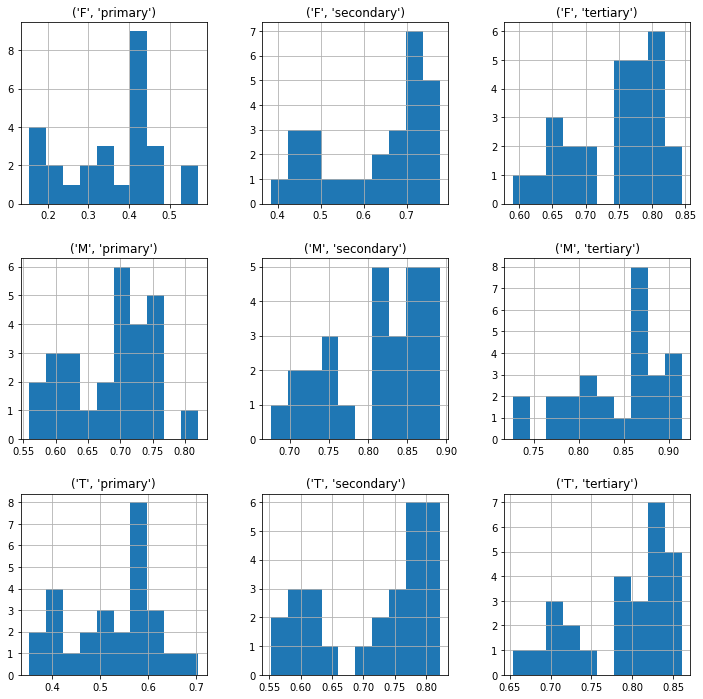

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
employmentAgeSexEduDF[employmentAgeSexEduDF.index.str.startswith("IT")]["2011"]["25-64"].hist(ax=ax);

## `lfsa_ergaed` at country level

Here we just load the table and pivot it.

In [21]:
employmentAgeSexEduCountryDF = pd.read_csv("resources/Europe/population/structure/employmentsRatePerAgeSexEdu_NUTS0_2007-2016_lfsa_ergaed.tsv",
                                   sep="\t", na_values=":")

columnCodes = employmentAgeSexEduCountryDF.columns[0]
employmentAgeSexEduCountryDF["sex"] =  employmentAgeSexEduCountryDF[columnCodes].apply(lambda v: v.split(",")[1])
employmentAgeSexEduCountryDF["age"] =  employmentAgeSexEduCountryDF[columnCodes].apply(lambda v: v.split(",")[2])
employmentAgeSexEduCountryDF["edu"] =  employmentAgeSexEduCountryDF[columnCodes].apply(lambda v: v.split(",")[3])
employmentAgeSexEduCountryDF["NUTS"] = employmentAgeSexEduCountryDF[columnCodes].apply(lambda v: v.split(",")[4])

del employmentAgeSexEduCountryDF[columnCodes]

employmentAgeSexEduCountryDF = employmentAgeSexEduCountryDF[
                                    employmentAgeSexEduCountryDF["age"].isin(
                                        ["Y15-19", "Y20-24", "Y25-29", "Y30-34", "Y35-39", "Y40-44",
                                         "Y45-49", "Y50-54", "Y55-59", "Y60-64", "Y65-69", "Y70-74"]
                                    )
                                ]
# Cut the `Y`....
employmentAgeSexEduCountryDF["age"] = employmentAgeSexEduCountryDF["age"].apply(lambda v: v[1:])

# Rename education level....
employmentAgeSexEduCountryDF.replace({
                              "edu": {
                                  "ED0-2": "primary",
                                  "ED3_4": "secondary",
                                  "ED5-8": "tertiary",
                              },
                            }, inplace=True)

employmentAgeSexEduCountryDF = employmentAgeSexEduCountryDF[
                                    employmentAgeSexEduCountryDF["edu"].isin(
                                        ["primary", "secondary", "tertiary"]
                                    )
                                ]

employmentAgeSexEduCountryDF = employmentAgeSexEduCountryDF.pivot_table(index=["NUTS"], columns=["age", "sex"])

# Make it a fraction...
employmentAgeSexEduCountryDF /= 100.

employmentAgeSexEduCountryDF.head()

1992                                                             \
age    15-19                 20-24                      25-29             
sex        F      M       T      F         M         T      F         M   
NUTS                                                                      
AT       NaN    NaN     NaN    NaN       NaN       NaN    NaN       NaN   
BE    0.0645  0.083  0.0735  0.571  0.596333  0.593333  0.719  0.877333   
BG       NaN    NaN     NaN    NaN       NaN       NaN    NaN       NaN   
CH       NaN    NaN     NaN    NaN       NaN       NaN    NaN       NaN   
CY       NaN    NaN     NaN    NaN       NaN       NaN    NaN       NaN   

                            ...         2016                                \
age                30-34    ...        55-59     60-64                       
sex          T         F    ...            T         F         M         T   
NUTS                        ...                                              
AT         NaN       NaN    ...     0.664000  0.220333  0.375000  0.294000   
BE    0.802667  0.696333    ...     0.644333  0.223000  0.327333  0.276333   
BG         NaN       NaN    ...     0.652667  0.335000  0.494333  0.408000   
CH         NaN       NaN    ...     0.794333  0.523667  0.621667  0.572667   
CY         NaN       NaN    ...     0.616000  0.343333  0.505000  0.423000   

                                                               
age      65-69                      70-74                      
sex          F         M         T      F         M         T  
NUTS                                                           
AT    0.066000  0.117000  0.099333  0.042  0.084000  0.068000  
BE    0.044000  0.073667  0.054333    NaN  0.055000  0.023667  
BG    0.099500  0.157000  0.109667    NaN       NaN  0.055000  
CH    0.181667  0.266333  0.226667  0.101  0.168333  0.134333  
CY    0.091000  0.201667  0.141667  0.050  0.109000  0.082000  

[5 rows x 900 columns]

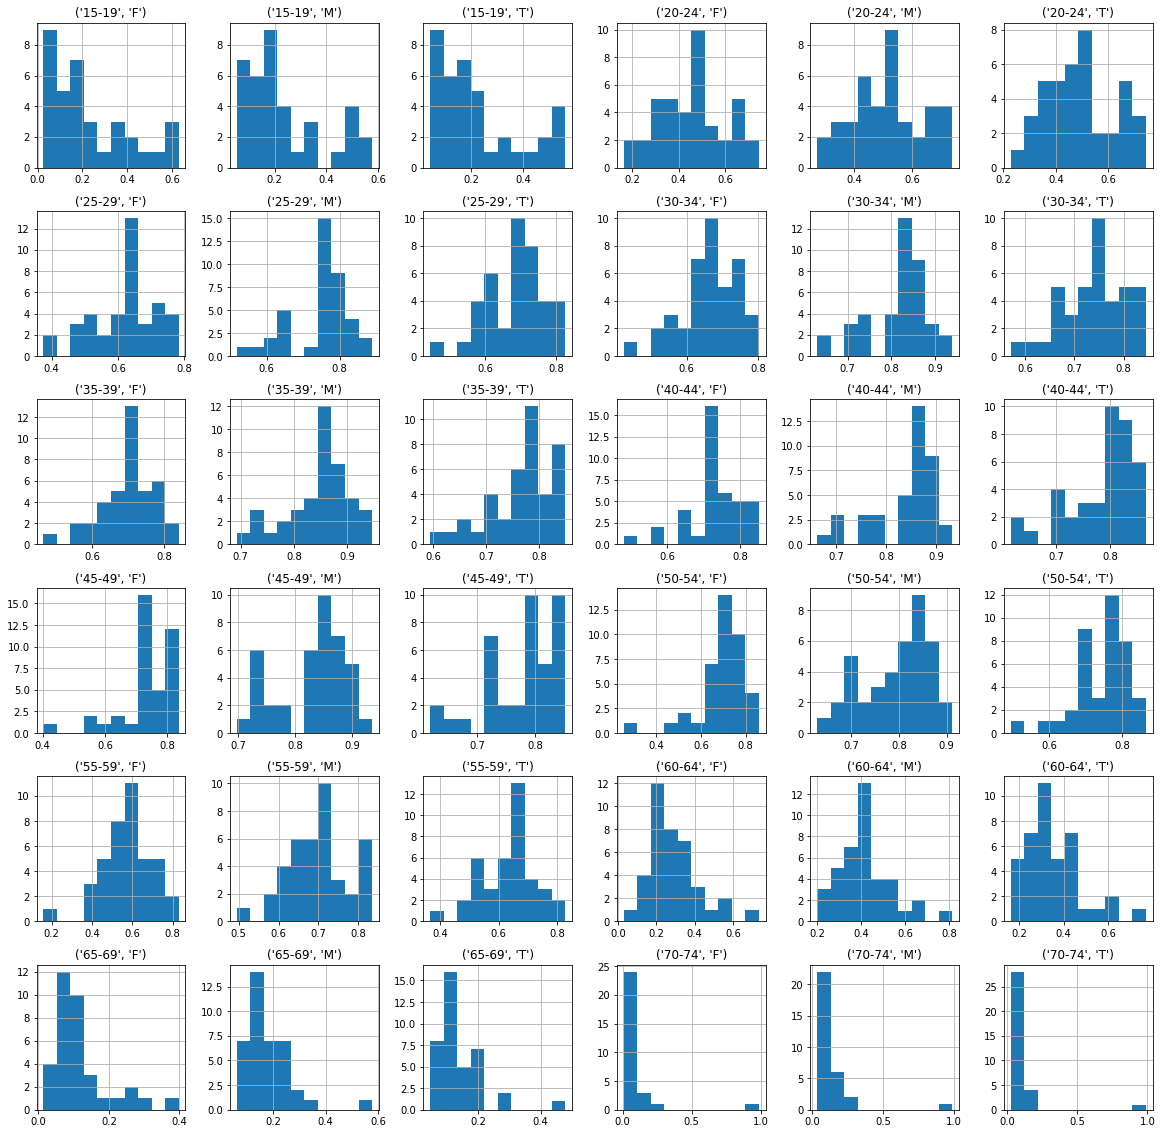

In [22]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
employmentAgeSexEduCountryDF["2011"].hist(ax=ax);

# Save data for later use

In [23]:
educationRateDF.to_pickle("resources/Europe/population/structure/dataframes/educationParticipationRate_NUTS2.pkl")

In [24]:
educationLevelPopDF.to_pickle("resources/Europe/population/structure/dataframes/educationLevel_NUTS2_RAW.pkl")
educationLevelPopPDF_df.to_pickle("resources/Europe/population/structure/dataframes/educationLevel_NUTS2_PDF.pkl")
educationLevelPopCDF_df.to_pickle("resources/Europe/population/structure/dataframes/educationLevel_NUTS2_CDF.pkl")

In [25]:
employmentAgeSexEduDF.to_pickle("resources/Europe/population/structure/dataframes/employmentSexAgeEdu_NUTS2.pkl")
employmentAgeSexEduCountryDF.to_pickle("resources/Europe/population/structure/dataframes/employmentSexAgeEdu_Country.pkl")